<a href="https://colab.research.google.com/github/josejulianhidayat/Clustering_dan_Klasifikasi-marketing_campaign/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_JoseJulianHidayat_R2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Import pustaka yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Memuat dataset hasil clustering
file_path = 'hasil_clustering_R2.csv'  # Sesuaikan nama file jika berbeda
dataset = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama untuk verifikasi
print("Dataset yang Dimuat:")
print(dataset.head())


Dataset yang Dimuat:
         ID  Year_Birth  Education  Marital_Status    Income   Kidhome  \
0 -1.059503   -1.388028  -0.338671        0.255925  0.264856  0.726974   
1  0.170219    1.284550  -0.338671        1.197697 -0.955969  0.726974   
2  0.168685    1.373636   1.419507       -0.685847 -0.534029  0.726974   
3 -1.114730    1.195464  -0.338671       -0.685847  0.630723  0.726974   
4 -1.607785    0.571862  -1.217761       -0.685847 -2.142582 -1.089709   

   Teenhome  Dt_Customer   Recency  MntWines  ...  AcceptedCmp4  AcceptedCmp5  \
0  0.796052    -0.889215 -0.444219 -0.638585  ...           0.0           0.0   
1 -1.044627    -0.674700 -0.861718 -0.638585  ...           0.0           0.0   
2 -1.044627    -0.870287 -0.652969 -0.324825  ...           0.0           0.0   
3 -1.044627    -0.018536 -1.383592 -0.667547  ...           0.0           0.0   
4 -1.044627    -0.245669  0.286404 -0.662720  ...           0.0           0.0   

   AcceptedCmp1  AcceptedCmp2      Complain  Z_

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan label (y)
X = dataset.drop(columns=['Cluster'])  # 'Cluster' adalah label hasil clustering
y = dataset['Cluster']

# Memisahkan data menjadi training set (80%) dan test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifikasi bentuk data
print("Data Training:")
print(f"Fitur: {X_train.shape}, Label: {y_train.shape}")
print("\nData Testing:")
print(f"Fitur: {X_test.shape}, Label: {y_test.shape}")


Data Training:
Fitur: (624, 30), Label: (624,)

Data Testing:
Fitur: (156, 30), Label: (156,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Langkah 1: Verifikasi Tipe Data
print("Tipe data di X_train sebelum encoding:")
print(X_train.dtypes)

print("\nTipe data di y_train sebelum encoding:")
print(y_train.dtypes)

# Langkah 2: Encoding Data Kategorikal di X_train dan X_test
categorical_cols = X_train.select_dtypes(include=['object']).columns  # Identifikasi kolom kategorikal
encoder = LabelEncoder()

for col in categorical_cols:
    X_train[col] = encoder.fit_transform(X_train[col])  # Encoding data latih
    X_test[col] = encoder.transform(X_test[col])  # Encoding data uji

# Encoding y_train dan y_test jika perlu
if y_train.dtypes == 'object' or y_train.dtypes == 'category':
    y_train = encoder.fit_transform(y_train)
    y_test = encoder.transform(y_test)

print("\nTipe data di X_train setelah encoding:")
print(X_train.dtypes)

# Langkah 3: Latih Model
model = RandomForestClassifier(random_state=42)

# Melatih model
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
print("\nAkurasi Model pada Data Uji:")
print(accuracy_score(y_test, y_pred))

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))


Tipe data di X_train sebelum encoding:
ID                     float64
Year_Birth             float64
Education              float64
Marital_Status         float64
Income                 float64
Kidhome                float64
Teenhome               float64
Dt_Customer            float64
Recency                float64
MntWines               float64
MntFruits              float64
MntMeatProducts        float64
MntFishProducts        float64
MntSweetProducts       float64
MntGoldProds           float64
NumDealsPurchases      float64
NumWebPurchases        float64
NumCatalogPurchases    float64
NumStorePurchases      float64
NumWebVisitsMonth      float64
AcceptedCmp3           float64
AcceptedCmp4           float64
AcceptedCmp5           float64
AcceptedCmp1           float64
AcceptedCmp2           float64
Complain               float64
Z_CostContact          float64
Z_Revenue              float64
Response               float64
Age_Group               object
dtype: object

Tipe data di y_t

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Akurasi: 0.99
F1-Score: 0.99
Precision: 0.99
Recall: 0.99

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.99      1.00      0.99        77
           2       1.00      0.97      0.98        30

    accuracy                           0.99       156
   macro avg       1.00      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156



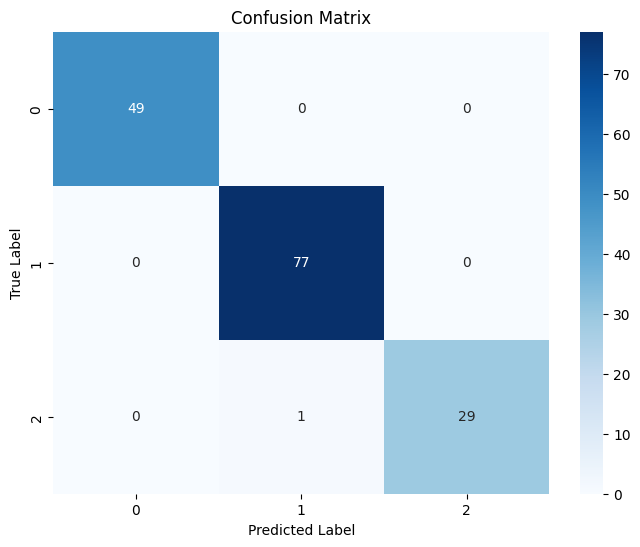

In [6]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Langkah 1: Prediksi Data Uji
y_pred = model.predict(X_test)

# Langkah 2: Hitung Metrik Evaluasi
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Akurasi: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# Langkah 3: Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Definisikan parameter yang akan dituning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Melakukan pencarian hyperparameter terbaik
grid_search.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Hyperparameter Terbaik:")
print(grid_search.best_params_)

print("\nAkurasi Terbaik pada Cross-Validation:")
print(grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Hyperparameter Terbaik:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}

Akurasi Terbaik pada Cross-Validation:
0.9743741935483872


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Akurasi Model setelah Tuning pada Data Uji: 0.99

Laporan Klasifikasi setelah Tuning:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.99      0.99      0.99        77
           2       0.97      0.97      0.97        30

    accuracy                           0.99       156
   macro avg       0.98      0.98      0.98       156
weighted avg       0.99      0.99      0.99       156



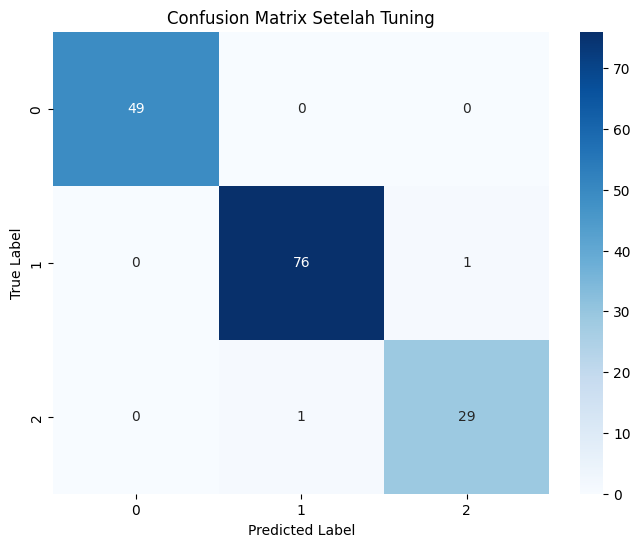

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Langkah 1: Definisikan ulang model dengan hyperparameter terbaik
best_rf_model = RandomForestClassifier(
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=50,
    random_state=42
)

# Langkah 2: Latih ulang model dengan data latih
best_rf_model.fit(X_train, y_train)

# Langkah 3: Melakukan prediksi ulang pada data uji
y_pred_best = best_rf_model.predict(X_test)

# Langkah 4: Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Akurasi Model setelah Tuning pada Data Uji: {accuracy:.2f}")

print("\nLaporan Klasifikasi setelah Tuning:")
print(classification_report(y_test, y_pred_best))

# Langkah 5: Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix Setelah Tuning")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berdasarkan hasil evaluasi setelah tuning:
----

Perbandingan Hasil Evaluasi Sebelum dan Setelah Tuning Sebelum Tuning:
----

Akurasi: 99.36%
Precision, Recall, F1-Score: Sangat tinggi untuk semua kelas.
Confusion Matrix: Hampir semua prediksi benar dengan sedikit kesalahan pada kelas tertentu (Cluster 2).
Setelah Tuning:
Akurasi: Tetap 99.36%, menunjukkan performa model konsisten.
Precision, Recall, F1-Score:
Hampir semua metrik mendekati 1.0, kecuali F1-Score untuk Cluster 2 sedikit menurun (0.97).
Cluster 2: Mengalami 1 kesalahan prediksi.
Confusion Matrix:
Tidak ada perubahan signifikan pada distribusi prediksi benar dan salah.

----------------------------------------------------------------------------

Identifikasi Kelemahan Model
----
Kelemahan pada Kelas Tertentu:

Cluster 2 memiliki F1-Score sedikit lebih rendah dibandingkan cluster lainnya. Ini disebabkan oleh kesalahan prediksi kecil.
Recall dan Precision untuk Cluster 2 tetap tinggi (0.97), tetapi masih lebih rendah dibandingkan Cluster 0 dan 1.
Overfitting atau Underfitting:

Tidak ada indikasi underfitting, karena performa model sangat baik pada data uji.
Tidak ada indikasi overfitting, karena akurasi pada data uji mendekati hasil cross-validation (97.44%), yang menunjukkan stabilitas model.

---------------
Rekomendasi Tindakan Lanjutan
---
1. Tambahkan Data untuk Cluster yang Kurang Representatif : Jika memungkinkan, kumpulkan lebih banyak data untuk Cluster 2 untuk memperbaiki representasi model terhadap kelas tersebut.
2. Eksplorasi Algoritma Lain: Coba algoritma lain seperti Gradient Boosting, XGBoost, atau SVM untuk melihat apakah mereka memberikan hasil lebih baik, khususnya untuk Cluster 2.
3. Feature Engineering: Lakukan eksplorasi lebih lanjut pada fitur, seperti menambahkan fitur baru atau menghapus fitur yang kurang relevan, untuk meningkatkan performa keseluruhan.

-------------------------------------
Kesimpulan
---
Model setelah tuning:

Memiliki performa konsisten dengan akurasi tinggi (99.36%).
Sedikit kelemahan pada Cluster 2 yang dapat diatasi dengan menambahkan data atau mencoba algoritma lain.
Model sudah memenuhi kriteria keberhasilan submission dan dapat digunakan untuk aplikasi praktis.